# Notebook Data Titanic

Aqui está uma ilustração de um problema de análise de dados, aplicação de modelo de Machine Learning (ML), 'KNeighborsClassifier', usando o data set Titanic. Refêrencias e os dados utilizados podem ser encontrandos nas refêrencias no final do trabalho.Este é um dos meus primeiros trabalhos em ML. Este trabalho ainda não está finalizado, sendo qualquer feedback muito bem vindo.
    
Here a picutre of one problem about data analises, applying ML KNeighborsClassifier. I am not a inglish native speak so forgive me my grammar erros. The code has comments in english and Portuguese, Brazil.This work still are not finished, so, any feedback are welcome.
    

<img src='./img/imgTitanic2.jpeg' style='width:500px;height:200px'>

## Análise exploratória de dados (Exploratory Data Analysis - EDA)

In [215]:

#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.utils import shuffle
from sklearn import linear_model, preprocessing
from sklearn.neighbors import KNeighborsClassifier


In [216]:
# setting style seaborn
sns.set(style="ticks", color_codes=True)

In [217]:
#Import data

#train data
dfTrain = pd.read_csv('./data/train.csv')

#test data
dfTest = pd.read_csv('./data/test.csv')

#combine train and test dataSet.
dfCombine = pd.concat([dfTrain.drop('Survived', 1),dfTest])

In [218]:
#head data
# Visualização das 5 primeiras linhas do DataSet usado para treino.
# Showing the first 5 rows in data set train.
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [219]:
# head data test

# showing the first 5 rows in data frame used para test.
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [220]:
#Some info about dfTrain.
#Algumas informações sobre o dfTrain.
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [221]:
#Some info about dfTest
#Algumas informações sobre dfTest
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [222]:
#Some info about dfCombine
#Algumas informaçẽos sobre o dfCombine.
dfCombine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


<b>Podemos observar:</b><br>
<lu>
<li>O data set possui relativamente baixa dimensionalidade, relativamente poucas colunas e linhas.</li><br>
<li>A maior parte das colunas não apresenta problemas com valores faltantes, sendo a coluna 'Cabin' a coluna com maior problema de valores não preenchidos, seguida pelas colunas 'Age' e 'Embarked'.</li>
</lu>

<b>Um rápido olhar para os valores faltantes: </b><br><br>
<b>Coluna "Age": </b>

In [223]:
 # Porcentagem relativa dos valores faltantes dfTrain.

ageIsNull = dfTrain[dfTrain['Age'].isnull() == True]

print('Porcentagem relativa das idades faltantes por algumas caracteristicas:'); print('\n',40*'-')

print(len(ageIsNull)/len(dfTrain)); print(40*'-')
print(ageIsNull['Survived'].value_counts(normalize=True)); print(40*'-')
print(ageIsNull['Pclass'].value_counts(normalize=True)); print(40*'-')
print(ageIsNull['Sex'].value_counts(normalize=True)); print(40*'-')
print(ageIsNull['Embarked'].value_counts(normalize=True)); print(40*'-')

Porcentagem relativa das idades faltantes por algumas caracteristicas:

 ----------------------------------------
0.19865319865319866
----------------------------------------
0    0.706215
1    0.293785
Name: Survived, dtype: float64
----------------------------------------
3    0.768362
1    0.169492
2    0.062147
Name: Pclass, dtype: float64
----------------------------------------
male      0.700565
female    0.299435
Name: Sex, dtype: float64
----------------------------------------
S    0.508475
Q    0.276836
C    0.214689
Name: Embarked, dtype: float64
----------------------------------------


Neste etapa demos uma rápida olhada sobre algumas caracteristicas para os valoes faltantes da coluna <b>Age</b>, isso nos pode servir mais tarde quando formos tratar esses valores.<br><br>
<b>Podemos observar</b><br>
<ul>
<li>Nos dados de treino, quase 20% dos dados apresenta valor faltante em <b>Age</b>, o que é uma quantidade relativamente alta, desse modo, precisamos definir um modo adequado de tratar esses dados.</li><br>
    <li>A maior parte dos valores faltantes em <b>Age</b> são de não sobreviventes, pertencentes a 3° classe, homens e que embarcaram em Southampton.</li>
</ul>

<br><b>Coluna "Embarked":</b>

In [224]:
# valores faltantes em Embarked

dfTrain[dfTrain['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<b>Nota: </b><br>
Interessante notar que os 2 únicos valores faltantes de <b>Embarked</b> pertencem a pessoas com o mesmo valor para <b>Ticket</b>, <b>Fare</b> e <b>Cabin</b>, são de mulheres que sobreviveram, não possuiam nenhum acompanhate e estavam na 1º classe.

<br><b>Coluna "Cabin":</b>

In [225]:
# Valores faltantes em "Cabin"
cabinIsNull = dfTrain[dfTrain['Cabin'].isnull() == True]

print('Porcentagem relativa dos dados faltantes em "Cabin" por algumas colunas: \n\n'); print(40*'-')
print(len(cabinIsNull)/len(dfTrain['Cabin'])); print(40*'-') #relative frequency 'Cabin' == Nan

print(cabinIsNull['Survived'].value_counts(normalize=True)); print(40*'-')
print(cabinIsNull['Sex'].value_counts(normalize=True)); print(40*'-')
print(cabinIsNull['Pclass'].value_counts(normalize=True)); print(40*'-')
print(cabinIsNull['Embarked'].value_counts(normalize=True)); print(40*'-')

Porcentagem relativa dos dados faltantes em "Cabin" por algumas colunas: 


----------------------------------------
0.7710437710437711
----------------------------------------
0    0.700146
1    0.299854
Name: Survived, dtype: float64
----------------------------------------
male      0.684134
female    0.315866
Name: Sex, dtype: float64
----------------------------------------
3    0.697234
2    0.244541
1    0.058224
Name: Pclass, dtype: float64
----------------------------------------
S    0.749636
C    0.144105
Q    0.106259
Name: Embarked, dtype: float64
----------------------------------------


<b>Podemos observar: </b><br>
<lu>
    <li>Em torno de 77% dos dados referentes a coluna "Cabin" são de dados faltantes.</li><br>
    <li>Dentre os dados faltantes em "Cabin" a maior parte pertence a não sobreviventes, sexo masculino, 3º classe e que embarcaram em Southampton.</li>
</lu>

<br><br><b>Algumas descrições númericas gerais: </b>

In [226]:
#Describe
# Descrição de alguns valores estatisticos: média, desvio padrão, min, max ..., para as colunas númericas.
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Temos algumas informações estatísticas bem úteis e que nos podem ajudar em outras etapas do trabalho.

In [227]:
# informações gerais sobre os dados

freqSurvived = dfTrain['Survived'].value_counts(normalize=True) 
freqPclass = dfTrain['Pclass'].value_counts(normalize=True) 
freqSex = dfTrain['Sex'].value_counts(normalize=True) 
freqEmbarked = dfTrain['Embarked'].value_counts(normalize=True, dropna=False)

print('Relative frequency Survived: \n'); print(freqSurvived); print(40*'-')
print('Relative frequency Pclass: \n'); print(freqPclass); print(40*'-')
print('Relative frequency Sex: \n'); print(freqSex); print(40*'-')
print('Relative frequency Embarked: \n'); print(freqEmbarked); print(40*'-')

Relative frequency Survived: 

0    0.616162
1    0.383838
Name: Survived, dtype: float64
----------------------------------------
Relative frequency Pclass: 

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64
----------------------------------------
Relative frequency Sex: 

male      0.647587
female    0.352413
Name: Sex, dtype: float64
----------------------------------------
Relative frequency Embarked: 

S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: Embarked, dtype: float64
----------------------------------------


<b>Podemos obervar que:</b><br>
<ul>
    <li>Os dados de treino contam com, em torno de, 68% de sobreviventes para 38% de não sobreviventes.</li>
    <li>A maior parte dos embarcantes são de 3º classe (em torno de 55%), seguindo por de 1º classe (em torno de 24%) e 2º classe (em torno de 20%).</li>
    <li>Em torno de 64% dos embarcantes são do sexo masculino e em torno de 35% para o sexo feminino.</li>
    <li>A maior parte dos embarcantes embarcou na cidade de Southampton.</li><br>
</ul>
Os histogramas abaixo resumem essas observações, fornencendo a contagem dos casos para as colunas.

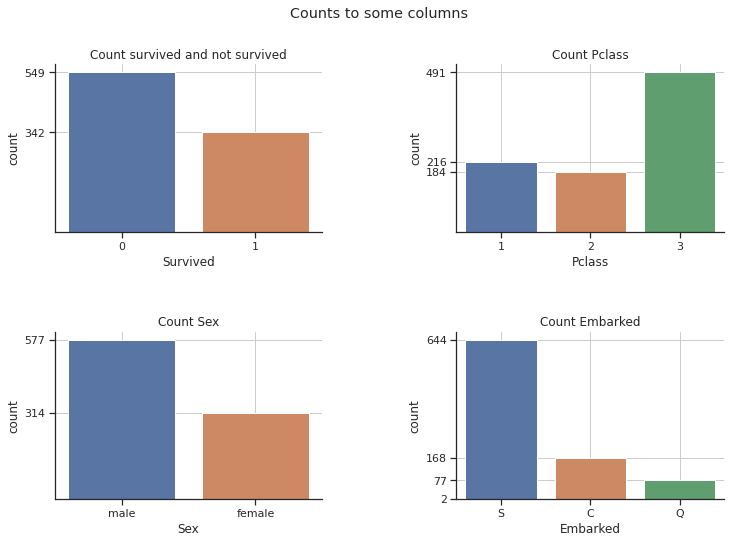

In [228]:
# Plot examples

fig, ([ax1, ax2],[ax3, ax4]) = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Counts to some columns')
fig.subplots_adjust(wspace=0.5, hspace=0.6)

Ax1 = sns.catplot(x='Survived', data=dfTrain, kind='count', ax=ax1)
Ax2 = sns.catplot(x='Pclass',data=dfTrain, kind='count', ax=ax2)
Ax3 = sns.catplot(x='Sex', data=dfTrain, kind='count', ax=ax3)
Ax4 = sns.catplot(x='Embarked', data=dfTrain, kind='count', ax=ax4)

ax1.set_title('Count survived and not survived')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid() 
ax1.set_yticks(dfTrain['Survived'].value_counts())

ax2.set_title('Count Pclass')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid()
ax2.set_yticks(dfTrain['Pclass'].value_counts())

ax3.set_title('Count Sex')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid()
ax3.set_yticks(dfTrain['Sex'].value_counts())

ax4.set_title('Count Embarked')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid()
ax4.set_yticks(dfTrain['Embarked'].value_counts(dropna=False))


plt.close(Ax1.fig)
plt.close(Ax2.fig)
plt.close(Ax3.fig)
plt.close(Ax4.fig)

plt.show()

<br><br>Abaixo é feito uma plotagem, heatmap, da matrix de correlação das <b>variaveis/features númericas</b> com a variavel <b>label</b> (<b>Survived</b>), o objetivo é podermos usala e compara-la mais adiante no trabalho.<br>

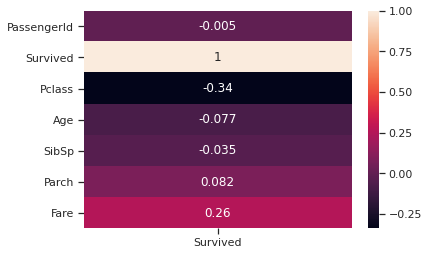

In [229]:

matCorr1 = dfTrain.corr()
sns.heatmap(matCorr1[['Survived']], annot=True)

plt.show()

<b>Observamos que: </b><br>
<ul>
    <li>A coluna "Fare" apresenta uma consideravel relação com a variavel alvo "Survived", seguida pela coluna "Parch".</li><br>

<b>Fazemos agora algumas comparações entre algumas colunas:</b><br>

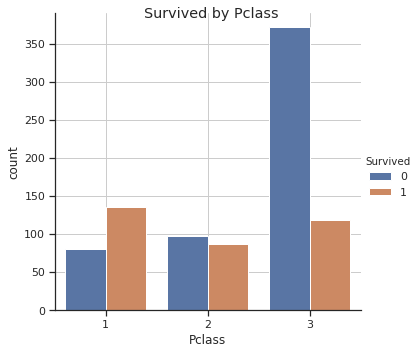

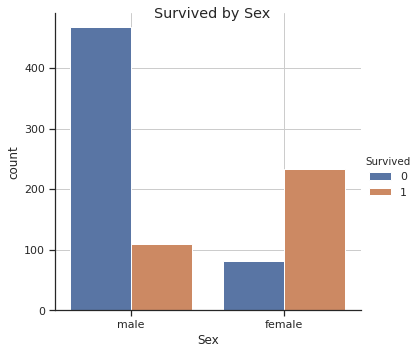

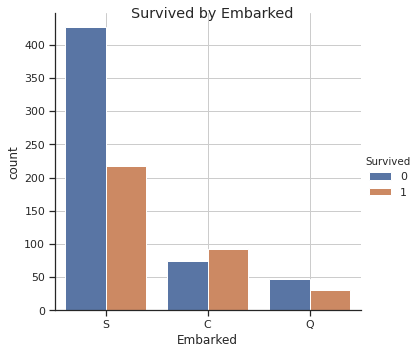

In [230]:
# Plots catplot, Survived by [someColumn]

# Survived by Pclass
g1 = sns.catplot(x='Pclass', data=dfTrain, hue='Survived', kind='count')
g1.fig.suptitle('Survived by Pclass')
plt.grid()


# Survived by Sex
g2 = sns.catplot(x='Sex', data=dfTrain, hue='Survived', kind='count')
g2.fig.suptitle('Survived by Sex')
plt.grid()

# Survived by Embarked
g3 = sns.catplot(x='Embarked', data=dfTrain, hue='Survived', kind='count')
g3.fig.suptitle('Survived by Embarked')
plt.grid()

plt.show()

<b>Pode-se observar que:</b><br>
<ul>
    <li>O maior número de mortos ocorreu na 3° classe e o menor na número na 1°, de modo que a 1º classe contém o maior número de sobreviventes.</li>
    <li>Dentre homens e mulheres, as mulheres contam com maior número de sobreviventes.</li>
    <li>O maior número de mortos ocorreu para os embarcantes na cidade de Southampton, o que provavelmente tem relação com o fato de ter-se mais embarcantes nesse cidade.</li>
</ul>

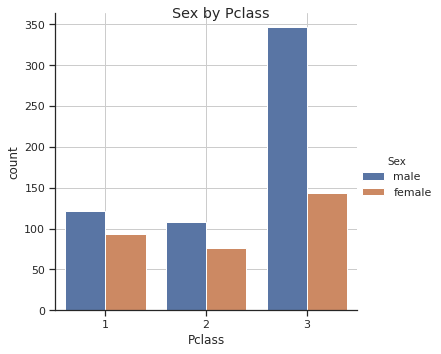

In [231]:

#Sex by Pclass
g = sns.catplot(x='Pclass', data=dfTrain, hue='Sex', kind='count')
g.fig.suptitle('Sex by Pclass')
plt.grid()

plt.show()

<b>Observa-se que: </b><br>
<ul>
    <li>De forma rápida pode-se observar que a 3° classe é constituída grandemente por homes.</li>
</ul><br>

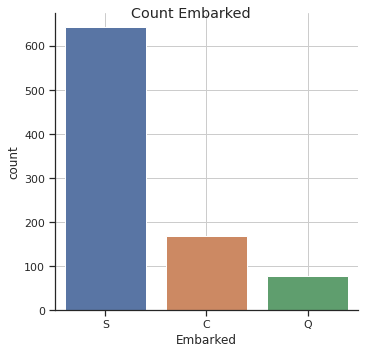

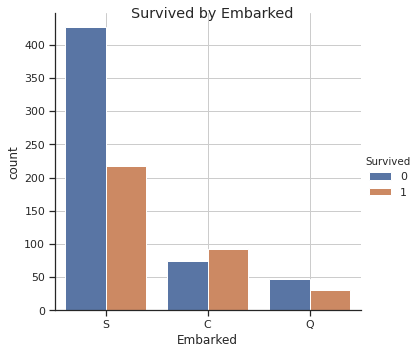

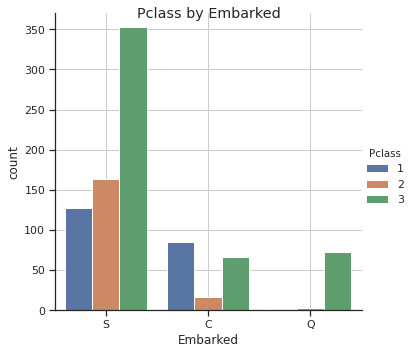

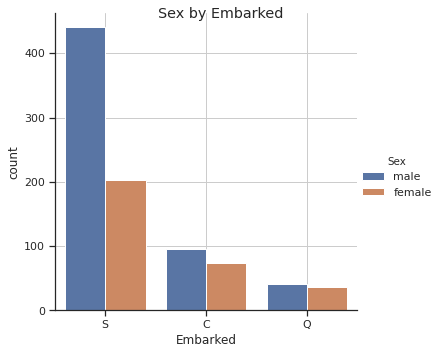

In [232]:
# Plot catplot, [SomeColumn by Embarked]

# Count Embarked, again
g0 = sns.catplot(x='Embarked', data=dfTrain, kind='count')
g0.fig.suptitle('Count Embarked')
plt.grid()

# Survived by Embarked
g1 = sns.catplot(x='Embarked', data=dfTrain, hue='Survived', kind='count')
g1.fig.suptitle('Survived by Embarked')
plt.grid()

# Pclass by Embarked
g2 = sns.catplot(x='Embarked', data=dfTrain, hue='Pclass', kind='count')
g2.fig.suptitle('Pclass by Embarked')
plt.grid()

# Sex by Embarked
g3 = sns.catplot(x='Embarked', data=dfTrain, hue='Sex', kind='count')
g3.fig.suptitle('Sex by Embarked')
plt.grid()

plt.show()

<b>Observa-se que:</b><br>
<ul>
    <li>A cidade de Southampton contém o maior número de embarcantes, sendo a maioria homens pertencentes a 3° classe que apresentam baixa taxa de sobrevivência.</li>
</ul><br>

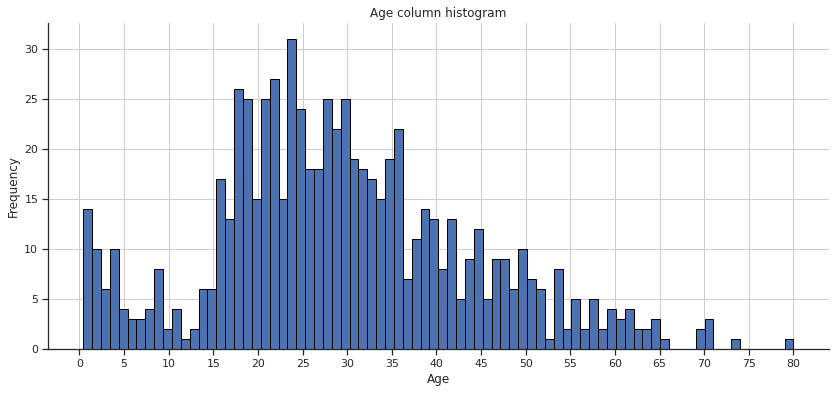

In [233]:
# Age column histogram

fig, ax = plt.subplots(figsize=(14,6))

ax.hist(dfTrain['Age'], bins=round(dfTrain['Age'].max()), edgecolor='black')
ax.set_title('Age column histogram')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
ax.set_xticks([x for x in range(0,85,5)])

plt.show()

<b>Observa-se que:</b><br>
<ul>
    <li>Grande parte dos embarcantes são jovens entre 16 e 36 anos, sendo que a maior frequência das idades ocorre entre os 20 e 30 anos.</li>
</ul><br>


Survived by Age


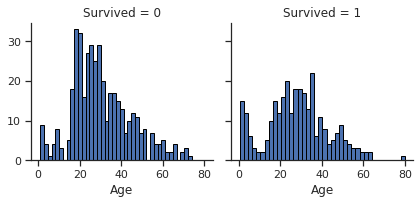


Sex by Age


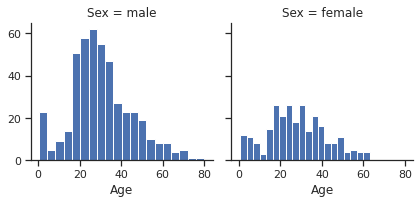


Pclass by Age


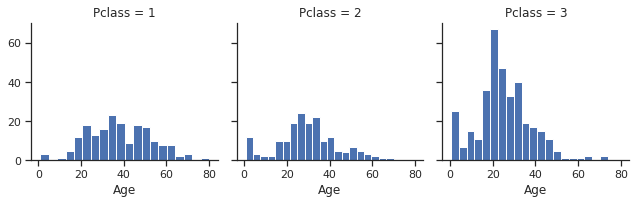


Embarked by Age


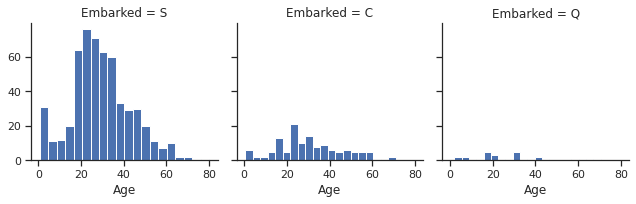

In [234]:
# Compare Age by [someColumn]

# Survived by Age
print('\nSurvived by Age')
g = sns.FacetGrid(dfTrain, col='Survived', margin_titles=True);
g.map(plt.hist, 'Age', bins=40, edgecolor='black')
#g.fig.suptitle('Surv. by Age')
plt.show()

# Sex by Age
print('\nSex by Age')
g2 = sns.FacetGrid(dfTrain,col='Sex')
g2.map(plt.hist,'Age', bins=20)
#g2.fig.suptitle('Sex by Age')
plt.show()

# Pclass by Age
print('\nPclass by Age')
g3 = sns.FacetGrid(dfTrain,col='Pclass')
g3.map(plt.hist, 'Age', bins=20)
#g3.fig.suptitle('Pclass by Age')
plt.show()

print('\nEmbarked by Age')
g4 = sns.FacetGrid(dfTrain, col='Embarked')
g4.map(plt.hist, 'Age', bins=20)
plt.show()

Os histogramas acima nos permitem tirar mais informações sobre distribuição das idades entre os sobreviventes e não sobreviventes, plot FacetGrid <b>Survived by Age</b>; sobre a distribuição dos sexos entre as idades, plot FacetGrid <b>Sex by Age</b>; sobre a distribuição das Classes pelas idades, plot FacetGrid <b>Pclass by Age</b>; e sobre a distribuição entre a cidade de embarque e a idade, plot FacetGrid <b>Embarked by Age</b>.
<br><br><b>Observa-se que: </b><br>
<ul>
    <li> A 3° classe contém o maior número de jovens.</li>
    <li>A cidade de Southampton é onde a maior parte dos jovens embarcaram.</li>
</ul><br>


Sex, Survived by Age


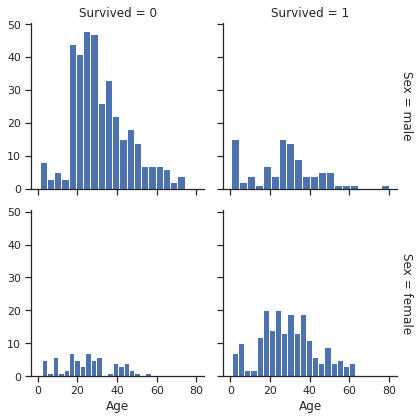

In [235]:
# Plot, example: Sex, Survived by Age

print('\nSex, Survived by Age')
g = sns.FacetGrid(dfTrain, row='Sex', col='Survived', margin_titles='True')
g.map(plt.hist, 'Age', bins=20)

plt.show()

<br>O exemplo acima nos permite comparar os dados das colunas <b>Sex</b>, <b>Survived</b> e <b>Age</b>. Podemos obserar, por exemplo, a distribuição das idades para as mulheres que não sobreviveram ou a distribuição das idades para os homens que que sobreviveram. 

<br>Abaixo trabalhamos um pouco com a coluna <b>Ticket</b> para tentarmos entender um pouco suas caracteristicas e relações.<b>

<b>Alguns detalhes coluna "Ticket":</b><br>

In [236]:
#Obtendo todos os valores da coluna "Ticket" e as vezes com que se repetem.
ticketValueCounts = dfTrain['Ticket'].value_counts(); ticketValueCounts

CA. 2343    7
1601        7
347082      7
CA 2144     6
3101295     6
           ..
2624        1
244373      1
392091      1
PC 17592    1
14312       1
Name: Ticket, Length: 681, dtype: int64

In [237]:
# Criando um array e um DataFrame do objeto acima para aplicar novamente um "value_counts", com o objetivo 
# de saber quantas vezes cada quantidade acima se repete.

arrayTicketValuesCont = np.array(ticketValueCounts) # Criando um array com o objeto TicketValueCounts acima.

dfTicketValuesCounts = pd.DataFrame(arrayTicketValuesCont, columns=['Count']); # Criando um DataFrame

dfTicketValuesCounts['Count'].value_counts() #aplicando "value_counts()" para saber quantas vezes cada valor acima se repete.


1    547
2     94
3     21
4     11
7      3
6      3
5      2
Name: Count, dtype: int64

In [238]:
valTicket0 = ticketValueCounts.keys()[0] # value "CA. 2343"
valTicket1 = ticketValueCounts.keys()[1] # value "347082"

dfTrain[dfTrain['Ticket'] == valTicket0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [239]:
dfTrain[dfTrain['Ticket'] == valTicket1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


<br><br><b>Observa-se que:</b><br>
<ul>
    <li>A coluna <b>Ticket</b> apresenta grande cadinalidade, ou seja, poucos valores se repetem. Existem 681 <b>unique</b> valores nessa coluna.</li>
    <li>Aparentemente as linhas em que <b>Ticket</b> se repete apresentam também mesmo valor para as colunas <b>Fare</b>, <b>Cabin</b>, <b>Embarked</b>, <b>Pclass</b> ou similar <b>Name</b>, sobrenomes iguais, indicando que pertencem a mesma familia, também apresenta alguma correlação entre as colunas <b>SibSp</b>, <b>Parch</b> e com a variavel label <b>Survived</b>.</li>
</ul>
<br><b>Ticket</b> é uma coluna que pode merecer alguma atenção especial. Talvez possa ser possível correlacionala com a coluna <b>Fare</b> por possuir, aparentemente, correlação e conter a possíbilidade de categorização.<br><br>
Abaixo é dado um olhar mais detalhado para a coluna <b>Fare</b>, entre os objetivos está a tentativa de achar alguma pista de uma possível melhor correlação entre <b>Fare</b> e <b>Ticket</b>.<br><br>

<b>Alguns detalhes coluna "Fare": </b><br>

In [240]:
dfTrain['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

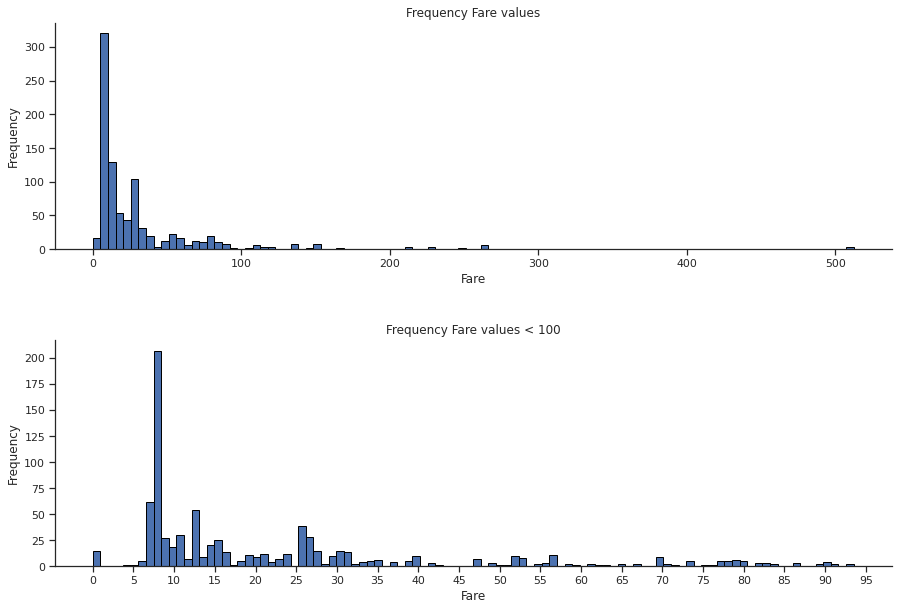

In [241]:

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,10))
fig.subplots_adjust(hspace=0.4)

ax1.hist(dfTrain['Fare'],bins=100, edgecolor='black')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title('Frequency Fare values')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Fare')

n = dfTrain[dfTrain['Fare'] < 100] # pegando Fare < 100, mudando escala. Como dar um zoon no gráfico.
ax2.hist(n['Fare'], bins=100, edgecolor='black')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xticks([x for x in range(0,100,5)])
ax2.set_title('Frequency Fare values < 100')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Frequency')

plt.show()

----------------------------------------------------------------------
Relative porcent Fare > 100:  0.05948372615039282
----------------------------------------------------------------------


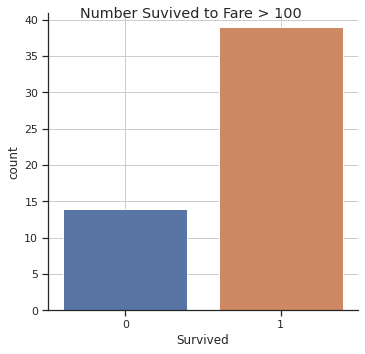

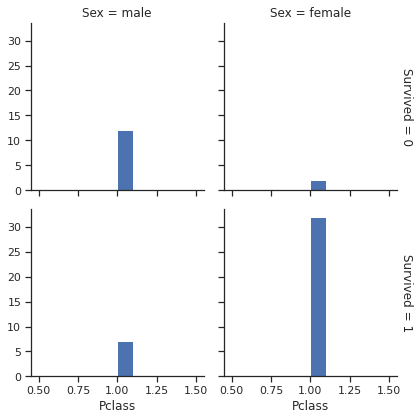

In [242]:

fareMaior100 = dfTrain[dfTrain['Fare'] > 100] # sample dfTrain Fare > 100

print(70*'-')
print('Relative porcent Fare > 100: ',len(fareMaior100)/len(dfTrain)); print(70*'-')

h = sns.catplot('Survived', data=fareMaior100, kind='count')
h.fig.suptitle('Number Suvived to Fare > 100')
plt.grid()

g = sns.FacetGrid(fareMaior100, row='Survived', col='Sex', margin_titles=True)
g.map(plt.hist, 'Pclass')
plt.show()



<br><b>Observa-se que:</b><br>
<ul>
    <li>A maior parte dos valores da coluna <b>Fare</b> estão abaixo de 100, sendo que a porcentagem relativa com que <b>Fare</b> apresenta valor > 100 está em torno de 6% dos dados.</li>
    <li>Todos os embarcantes com <b>Fare > 100</b> estão na 1° classe.</li>
    <li>A amostra <b>Fare > 100</b> apresenta grande taxa de sobrevivência.</li>
</ul><br><br>

In [243]:
#values Fare < 4
dfTrain[dfTrain['Fare'] < 4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


<br><b>Observa-se que:</b><br>
<ul>
    <li>Para <b>Fare < 4</b> quase todos os embarcantes não sobreviveram, embarcaram na mesma cidade, não possuiam membros da familia e são todos do mesmo sexo, homems.</li>
</ul>
Através das abservações acima a coluna <b>Fare</b> aparenta ser uma boa media de categorização para embarcantes.<br><br>

## Feature engeneering and more Plots

In [244]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
# copy the DataFrame
dfTrain2 = dfTrain.copy()
# dfTrain2 is dfTrain

In [246]:
# Dropped some columns that I will not use now.

dfTrain2 = dfTrain2.drop(['PassengerId','Ticket','Fare','Cabin','Name'],1) # 1 indicating that column will be dropped.

#Print out current dfTrain2
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [247]:


# mapping values to Sex
sex_map = {'male':0,'female':1}
dfTrain2['Sex'] = dfTrain2['Sex'].map(sex_map)

#Print out current dfTrain2
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,S
1,1,1,1,38.0,1,0,C
2,1,3,1,26.0,0,0,S
3,1,1,1,35.0,1,0,S
4,0,3,0,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,S
887,1,1,1,19.0,0,0,S
888,0,3,1,NaN,1,2,S
889,1,1,0,26.0,0,0,C


Acima neste trabalho vimos que a maior parte dos valores faltantes na coluna <b>Age</b> são de não sobreviventes, pertencentes a 3° classe, homens e que embarcaram em Southampton. Viu-se também, através das distribuições da idades, para os valores não faltantes, que grande parte dos embarcantes com essas caracteristicas estão com idade entre 20 e 30 anos. Desse modo abaixo se utiliza pelo valor da mediana das idades para substituir os valores faltantes.<br>

In [248]:
# Modificando a coluna Age e criando uma nova coluna Age_cat (categorizando a coluna Age) a partir de Age

# Mean and median to age column
ageMedia = dfTrain2['Age'].mean() # it is more affect by extreme values
ageMediana = dfTrain2['Age'].median()
#print('Mean age column: ', ageMedia)
#print('Median age column: ',ageMediana)

# Substitui os valores Nan da coluna Age pelo valor da mediana de Age
def age_nanToMedian(x):
    if(pd.isna(x)):
        return ageMediana
    else:
        return x

# Converte os valores dtype float64 para dtype int64 da coluna Age
def age_float64ToInt64(x):
    x = round(x)
    if(type(x) == np.float64):
        x = np.int64(x)
    return x


# Categoriza a coluna Age em 8 categorias baseado na idade.
def age_cat(x):
    if(x <= 10):
        x = 1
    elif(x > 10 and x <= 20):
        x = 2
    elif(x > 20 and x <= 30):
        x = 3
    elif(x > 30 and x <= 40):
        x = 4
    elif(x > 40 and x <= 50):
        x = 5
    elif(x > 50 and x <= 60):
        x = 6
    elif(x > 60 and x <= 70):
        x = 7
    elif(x > 70):
        x = 8
    return x


def age_cat2(x):
    m = 1;
    for i in range(5,61,5):
        if(x < i):
            x = m
            break
        m += 1;
    if(x >= 60):
        x = 13
    return x

#Aplica a função age_nanToMedian a coluna Age do dfTrain2
dfTrain2['Age'] = dfTrain2['Age'].apply(age_nanToMedian)

#Aplica a função age_float64ToInt64 a coluna Age do dfTrain2
dfTrain2['Age'] = dfTrain2['Age'].apply(age_float64ToInt64)

#Cria uma nova coluna, Age_cat (age categorizada), no dataFrame dfTrain2 a partir da coluna Age
#aplicando a função age_cat
dfTrain2['Age_cat'] = dfTrain2['Age'].map(age_cat2)

# print out current dfTrain2
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat
0,0,3,0,22,1,0,S,5
1,1,1,1,38,1,0,C,8
2,1,3,1,26,0,0,S,6
3,1,1,1,35,1,0,S,8
4,0,3,0,35,0,0,S,8
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,S,6
887,1,1,1,19,0,0,S,4
888,0,3,1,28,1,2,S,6
889,1,1,0,26,0,0,C,6


In [249]:
#categorização de "Age"
dfTrain2['Age_cat'].value_counts(dropna=False)

6     283
5     114
7      95
4      86
8      72
9      48
10     41
1      40
11     32
13     26
2      22
12     16
3      16
Name: Age_cat, dtype: int64

Acima neste trabalho vimos que os 2 únicos valores faltantes de Embarked pertencem a pessoas com o mesmo valor para Ticket, Fare e Cabin, são de mulheres que sobreviveram, não possuiam nenhum acompanhate e estavam na 1º  classe. Uma possível meio de tratar esses valores faltantes poderia ser substituindo pela moda de <b>Embarked</b>, "S". Outro meio é buscar nas distribuições feitas acima, para Embarked, qual cidade obtem-se maior número de caracteristicas que encontramos para esses valores faltantes, observando as distribuições pode-se obeservar que "S" também é uma boa estimativa para esses valores faltantes. 

In [250]:
# Trabalhando com a coluna Embarked

# Mapeando os valores de embarked
def embarked_map(x):
    if(x == 'S'):
        x = 0;
    elif(x == 'C'):
        x = 1
    else:
        x = 2
    x = np.int64(x)
    return x

# Substituindo os valores Nan de Embarked pela moda de Embarked
def embarked_nanClear(x):
    if(pd.isna(x)):
        x = dfTrain2['Embarked'].mode()[0] # Obtém e atribui a 'moda' da coluna Embarked
    return x

# Aplicando o mapeamento, embarked_map, sobre a coluna Embarked
dfTrain2['Embarked'] = dfTrain2['Embarked'].apply(embarked_map)

# Aplicando a função embarked_nanClear a coluna Embarked
dfTrain2['Embarked'] = dfTrain2['Embarked'].map(embarked_nanClear)

# Print out current dfTrain2
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat
0,0,3,0,22,1,0,0,5
1,1,1,1,38,1,0,1,8
2,1,3,1,26,0,0,0,6
3,1,1,1,35,1,0,0,8
4,0,3,0,35,0,0,0,8
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,0,6
887,1,1,1,19,0,0,0,4
888,0,3,1,28,1,2,0,6
889,1,1,0,26,0,0,1,6


In [251]:
# Criando uma nova coluna 'tam_family', tamanho da familia (acompanhantes), baseado
# na soma das colunas 'SibSp' e 'Parch'

# Criando nova coluna, 'tam_family' no dfTrain2
dfTrain2['tam_family'] = 0

# Preenchendo a coluna 'tam_family' com a soma das colunas 'SibSp' e 'Parch'
for i in range(len(dfTrain2['tam_family'])):
    dfTrain2.loc[i,'tam_family'] = (dfTrain2.loc[i,'SibSp'] + dfTrain2.loc[i,'Parch'])

# Print out current dfTrain2
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat,tam_family
0,0,3,0,22,1,0,0,5,1
1,1,1,1,38,1,0,1,8,1
2,1,3,1,26,0,0,0,6,0
3,1,1,1,35,1,0,0,8,1
4,0,3,0,35,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,0,6,0
887,1,1,1,19,0,0,0,4,0
888,0,3,1,28,1,2,0,6,3
889,1,1,0,26,0,0,1,6,0


A partir da coluna criada acima, <b>tam_family</b> podemos plotar alguns gráficos, observe abaixo:

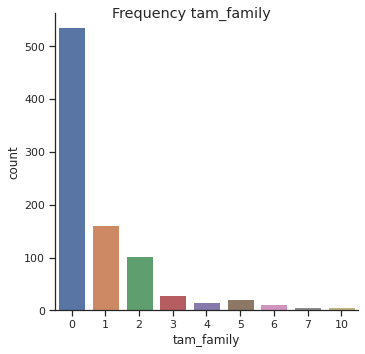

In [252]:

g = sns.catplot(x='tam_family', data=dfTrain2, kind='count')
g.fig.suptitle('Frequency tam_family') 

plt.show()

<b>Observa-se que: </b><br>
<ul>
    <li>A maior parte dos passageiros viajou sozinha.</li>
</ul>
Abaixo é representado algumas outras plotagens.

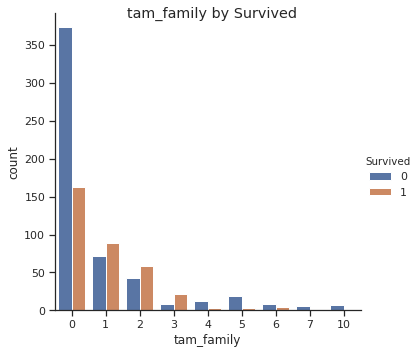

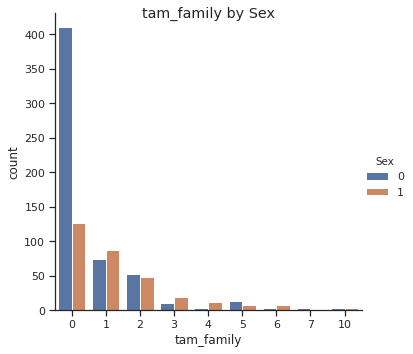

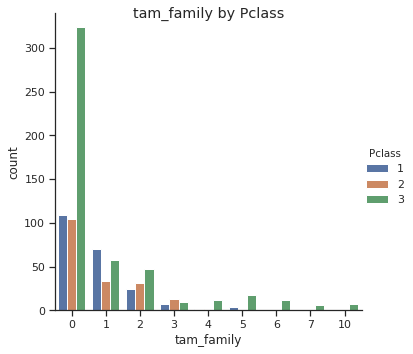

In [253]:
# Outras plotagens usando a coluna 'tam_family'

g = sns.catplot(x='tam_family', data=dfTrain2, hue='Survived', kind='count')
g.fig.suptitle('tam_family by Survived')

h = sns.catplot(x='tam_family', data=dfTrain2, hue='Sex', kind='count')
h.fig.suptitle('tam_family by Sex')

i = sns.catplot(x='tam_family', data=dfTrain2, hue='Pclass', kind='count')
i.fig.suptitle('tam_family by Pclass')

plt.show()

In [254]:
# Criando uma nova coluna 'is_alone' (está sozinho) baseado na coluna 'tam_family'

# Criando nova coluna, 'is_alone' no dfTrain2
dfTrain2['is_alone'] = 0

# Preeche a coluna 'is_alone' baseado na coluna 'tam_family'. Se 'tam_family' é igual a 0 significa que
# o passageira estava desacompanhado, sozinho.

for i in range(len(dfTrain2['is_alone'])):
    if(dfTrain2.loc[i,'tam_family'] >= 1):
        dfTrain2.loc[i,'is_alone'] = 1

dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat,tam_family,is_alone
0,0,3,0,22,1,0,0,5,1,1
1,1,1,1,38,1,0,1,8,1,1
2,1,3,1,26,0,0,0,6,0,0
3,1,1,1,35,1,0,0,8,1,1
4,0,3,0,35,0,0,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,0,6,0,0
887,1,1,1,19,0,0,0,4,0,0
888,0,3,1,28,1,2,0,6,3,1
889,1,1,0,26,0,0,1,6,0,0


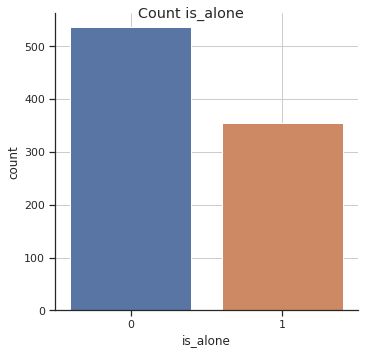

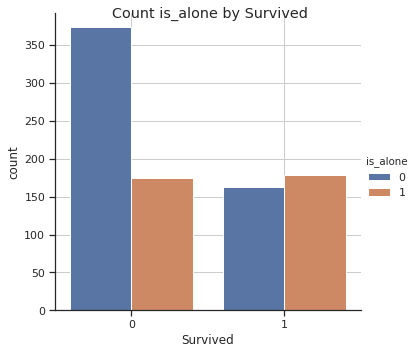

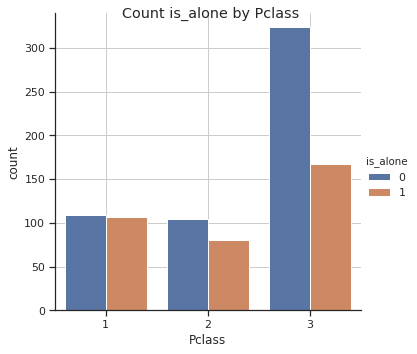

In [255]:

h = sns.catplot('is_alone', data=dfTrain2, kind='count')
h.fig.suptitle('Count is_alone')
plt.grid()

g = sns.catplot('Survived', data=dfTrain2, hue='is_alone', kind='count')
g.fig.suptitle('Count is_alone by Survived')
plt.grid()

i = sns.catplot('Pclass', data=dfTrain2, hue='is_alone', kind='count')
i.fig.suptitle('Count is_alone by Pclass')
plt.grid()

plt.show()

# stope here

In [256]:
# Trabalhando com a coluna 'Name'
# Get the Name titles

nameCol = dfTrain['Name']
titleName = []

#Obtem dos os títulos dos nomes, exemplo: 'Mr.', 'Miss.', 'Mrs.', ....
for i in nameCol:
    tempSplitName = i.split(' ')# Divide cada nome, pelo espaço em branco, formando uma lista
    tempIndex = 1
    for i in range(len(tempSplitName)):
        if(tempSplitName[i].find('.') >= 1):#verifica em qual index, lugar da lista, (nome), está o título do nome.
            tempIndex = i
            break
    titleName.append(tempSplitName[tempIndex]) #armazena o título do nome obtido na lista titleName.
    tempSplitName.clear() # lima a lista tempSplitName para uma nova iteração.

    
# Cria um dataFrame com uma coluna, chamada 'Name', com os valores dos títulos dos nomes.
dfTitleName = pd.DataFrame(titleName, columns=['Name'])

# Cria uma nova coluna, 'Name', no dfTrain2 e preenche com os valores de dfTitleName
dfTrain2['Name'] = dfTitleName.copy()

#print(dfTrain2[dfTrain2['Name'] == 'Capt.']) # Capitão não sobreviveu

# value_counts() sobre a coluna 'Name' do dfTrain2, criada e preenchida acima.
namesValueCounts = dfTrain2['Name'].value_counts(); 

# Print out value_counts column 'Name'.
namesValueCounts

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Countess.      1
Ms.            1
Sir.           1
Capt.          1
Jonkheer.      1
Mme.           1
Don.           1
Lady.          1
Name: Name, dtype: int64

In [257]:
# Obtem os titulos dos nomes que ocorrem poucas vezes

k = namesValueCounts.keys() # obtem as keys sobre value_counts() obtido acima. obtem os valores 'Mr.', 'Miss.',...
otherNames = []

for i in range(len(namesValueCounts)):
    if(namesValueCounts[i] <= 5):#veririca se o título do nome possui menos que 5 ocorrências.
        otherNames.append(k[i])#armazena em otherNames as keys que possuem menos que 5 ocorrências.

# print out, títulos dos nomes que ocorrem poucas vezes, menor que 5 ocorrências.
otherNames

['Mlle.',
 'Col.',
 'Major.',
 'Countess.',
 'Ms.',
 'Sir.',
 'Capt.',
 'Jonkheer.',
 'Mme.',
 'Don.',
 'Lady.']

In [258]:
# Change the Name column. Substitui os valores que ocorrem poucas vezes, obtido acima por 'OtherTitle'.

# troca os titulos que ocorrem poucas vezes, obtido acima, pela label, rótulo 'otherTitle'.
# Exemplo, substitui as ocorrenceas de 'Major' por 'otherTitle'. 
def change_titleToOtherTitle(x):
    for i in otherNames:
        if(x == i):
            return 'OtherTitle'
    return x

#Aplica a função 'change_titleToOtherTitle' sobre a coluna 'Name' do dfTrain2
dfTrain2['Name'] = dfTrain2['Name'].apply(change_titleToOtherTitle)

#Print out value_counts() current column 'Name' do dfTrain2
nameValueCounts = dfTrain2['Name'].value_counts(); nameValueCounts

Mr.           517
Miss.         182
Mrs.          125
Master.        40
OtherTitle     14
Dr.             7
Rev.            6
Name: Name, dtype: int64

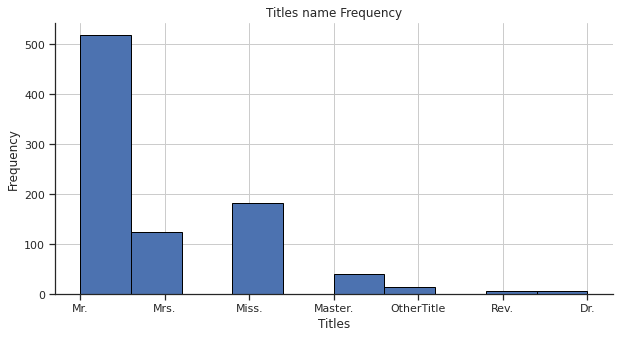

In [259]:
# Plotando a distribuição dos títulos.

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(dfTrain2['Name'], edgecolor='black')
ax.set_title('Titles name Frequency')
ax.set_xlabel('Titles')
ax.set_ylabel('Frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()

plt.show()

In [260]:
# Trabalhando com a coluna 'Fare'

# Using coluna 'Fare', categorizando-a.

fareMin = dfTrain['Fare'].min()
fareMax = dfTrain['Fare'].max()

# Função para categorizar a coluna 'Fare'. 
def cat_fare(x):
    if(x <= 30):
        temp1 = 1;
        for i in range(5,31,5):
            if(x <= i):
                x = temp1
                break
            temp1 += 1
    elif(x > 30 and x <= 100):
        temp2 = 7
        for i in range(40, 101, 10):
            if(x <= i):
                x = temp2
                break
            temp2 += 1
    else:
        temp3 = 14
        for i in range(200, 601, 100):
            if(x <= i):
                x = temp3
                break
            temp3 += 1
    x = np.int64(x)
    return x
        

#Cria a coluna 'cat_fare' e preenche seus valores com a função 'cat_fare'     
dfTrain2['cat_fare'] = dfTrain['Fare'].apply(cat_fare)

# Print out current 'cat_fare' do dfTrain2
dfTrain2['cat_fare'].value_counts()

2     319
3     122
6     100
7      58
4      57
5      42
9      38
14     33
11     31
15     17
12     17
10     17
1      17
8      16
13      4
18      3
Name: cat_fare, dtype: int64

In [261]:

#Print out current dfTrain2
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat,tam_family,is_alone,Name,cat_fare
0,0,3,0,22,1,0,0,5,1,1,Mr.,2
1,1,1,1,38,1,0,1,8,1,1,Mrs.,11
2,1,3,1,26,0,0,0,6,0,0,Miss.,2
3,1,1,1,35,1,0,0,8,1,1,Mrs.,9
4,0,3,0,35,0,0,0,8,0,0,Mr.,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,0,6,0,0,Rev.,3
887,1,1,1,19,0,0,0,4,0,0,Miss.,6
888,0,3,1,28,1,2,0,6,3,1,Miss.,5
889,1,1,0,26,0,0,1,6,0,0,Mr.,6


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat,tam_family,is_alone,Name,cat_fare
0,0,3,0,22,1,0,0,5,1,1,Mr.,2
1,1,1,1,38,1,0,1,8,1,1,Mrs.,11
2,1,3,1,26,0,0,0,6,0,0,Miss.,2
3,1,1,1,35,1,0,0,8,1,1,Mrs.,9
4,0,3,0,35,0,0,0,8,0,0,Mr.,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,0,6,0,0,Rev.,3
887,1,1,1,19,0,0,0,4,0,0,Miss.,6
888,0,3,1,28,1,2,0,6,3,1,Miss.,5
889,1,1,0,26,0,0,1,6,0,0,Mr.,6


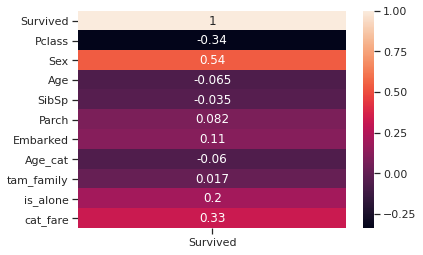

In [262]:
#mapr = {'Died':0,'Survived':1}
#dfTrain2['Survived'] = dfTrain2['Survived'].map(mapr)

matCorr = dfTrain2.corr()
sns.heatmap(matCorr[['Survived']],annot=True)
dfTrain2

## Applying model ML

In [280]:
# Features and labels

#features aos quais irá se aplicar o modelo de ML
features = ['Pclass', 'Sex','Embarked','Age_cat','Name','cat_fare','Parch','SibSp']

# Label para ML
label = 'Survived'

In [281]:
# Usando LabelEncoder para categorizar todas as features, obtendo valores int, para se aplicar o modelo Ml.

labEncod = preprocessing.LabelEncoder()

feat = []

for i in features:
    feat.append(labEncod.fit_transform(list(dfTrain2[i])))
    
z = zip(*feat)   
# mesmo efeito que: z = zip(feat[0],feat[1],feat[2],feat[3],feat[4],feat[5],feat[6], ...), ou seja,
# zipar uma lista de listas.
    

x = list(z) #features encoded
y = list(labEncod.fit_transform(list(dfTrain[label]))) #label encoded



In [285]:
# Aplicando modelo ML, KNeighborsClassifier.
# 

n = 1000 # número de vezes para rodar a aplicação do modelo para se obter a melhor accuracia dentre esse numero de vezes.
bAccuracy = 0 # armazena melhor acuracia obtida.
bModel = 0 # armazena melhor modelo obtido.

for i in range(n):
    
    # separa os dados em train e test, pegando 10% dos dados para test
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    # Cria instancia do modelo KNeighborsClassifier com 9 vizinhos
    model = KNeighborsClassifier(n_neighbors=9)

    # aplica o modelo KNeighborsClassifier aos dados de treino.
    model.fit(x_train,y_train)
    
    # teste o modelo obtido na linha acima aos dados de teste para se obter a acurâcia.
    accuracy = model.score(x_test,y_test)
    
    # verifica e armazena o melhor modelo obtido dentro do número de vezes que se rodou o modelo.
    if(accuracy > bAccuracy):
        bAccuracy = accuracy
        bModel = model

        
# Print out melhor Accuracy obtida        
print('Accuracy: ', bAccuracy)


Accuracy:  0.9222222222222223


In [50]:
#Predicted

example = []

#Applying model about x_test
predicted = bModel.predict(x_test)

for i in range(len(x_test)):
    example.append([predicted[i], x_test[i], y_test[i]])

#Building a DataFrame with example values 
dfExample = pd.DataFrame(example, columns=['Predicted','features','RealValue'])

#Print out dfExample
dfExample

,Predicted,features,RealValue
0,1,"(2, 0, 2, 2, 2, 4, 0, 1, 2)",1
1,0,"(2, 1, 2, 2, 0, 3, 0, 0, 0)",0
2,0,"(2, 1, 2, 2, 0, 3, 0, 0, 0)",0
3,0,"(1, 0, 2, 2, 3, 4, 0, 1, 1)",1
4,1,"(0, 0, 2, 2, 1, 4, 0, 1, 0)",1
...,...,...,...
85,0,"(2, 1, 0, 2, 0, 3, 0, 0, 0)",0
86,0,"(2, 1, 2, 2, 8, 3, 0, 1, 2)",0
87,1,"(0, 0, 2, 3, 1, 4, 0, 1, 0)",1
88,0,"(2, 1, 0, 4, 0, 3, 0, 0, 0)",0


## References


    [1]https://www.kaggle.com/gulyvz/statistics-101
    [2]https://www.kaggle.com/startupsci/titanic-data-science-solutions
    [3]https://medium.com/@carlosbaia/visualiza%C3%A7%C3%A3o-e-an%C3%A1lise-de-dados-811780fd0e9f
    [4]https://seaborn.pydata.org/tutorial/axis_grids.html
    [5]https://techwithtim.net/tutorials/machine-learning-python/k-nearest-neighbors-3/
    [6]https://www.kaggle.com/c/titanic
 


